In [1]:



import pandas as pd


In [2]:
#  How do I change the data type of a pandas Series?



In [3]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
drinks.beer_servings.astype('float').head()

0      0.0
1     89.0
2     25.0
3    245.0
4    217.0
Name: beer_servings, dtype: float64

In [5]:
# how to define the type of columns before reading csv
drinks = pd.read_csv('http://bit.ly/drinksbycountry', dtype={'beer_servings': float})

In [6]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0,0,0.0,Asia
1,Albania,89.0,132,54,4.9,Europe
2,Algeria,25.0,0,14,0.7,Africa
3,Andorra,245.0,138,312,12.4,Europe
4,Angola,217.0,57,45,5.9,Africa


In [7]:
#to present true and false as  0 and 1

In [8]:
drinks.continent.str.contains('Asia')

0       True
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12      True
13      True
14     False
15     False
16     False
17     False
18     False
19      True
20     False
21     False
22     False
23     False
24      True
25     False
26     False
27     False
28     False
29     False
       ...  
163    False
164    False
165    False
166    False
167     True
168     True
169     True
170    False
171     True
172    False
173    False
174    False
175    False
176     True
177     True
178    False
179    False
180    False
181     True
182    False
183    False
184    False
185    False
186     True
187    False
188    False
189     True
190     True
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [9]:
drinks.continent.str.contains('Asia').astype(int).head()

0    1
1    0
2    0
3    0
4    0
Name: continent, dtype: int32

In [10]:
#When should I use a "groupby" in pandas
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [11]:
#avg drink servings by continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [17]:
#how it works
drinks[drinks.continent=='Africa'].beer_servings.mean() #analysing beer servings for each continent mean beer servings

61.471698113207545

In [19]:
drinks[drinks.continent=='Africa'].beer_servings.agg(['mean', 'max', 'min'])

mean     61.471698
max     376.000000
min       0.000000
Name: beer_servings, dtype: float64

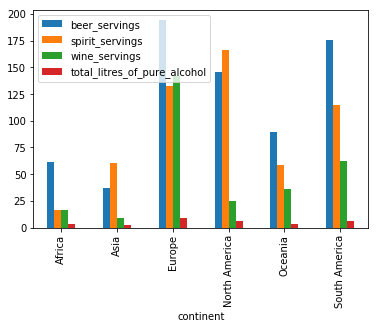

In [24]:
%matplotlib inline
drinks.groupby('continent').mean().plot(kind='bar')

In [25]:
#How do I explore a pandas Series?
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [27]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [29]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [33]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [37]:
movies.genre.value_counts(normalize=True) #output is series ; so can use series' method

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [38]:

movies.genre.value_counts(normalize=True).head()

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Name: genre, dtype: float64

In [40]:
movies.genre.nunique()

16

In [43]:
#CROSS TABULATION
pd.crosstab(movies.genre,movies.content_rating) #bothe features are objects, categorical

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [45]:

movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [47]:
movies.duration.value_counts()

112    23
113    22
102    20
101    20
129    19
120    18
105    18
126    18
98     18
130    18
100    17
121    17
116    17
124    16
122    16
118    16
115    16
96     16
104    16
110    16
107    16
109    16
119    15
114    15
99     15
108    15
94     14
117    14
106    14
93     14
       ..
70      1
69      1
67      1
66      1
242     1
238     1
195     1
229     1
224     1
220     1
216     1
212     1
207     1
205     1
202     1
201     1
200     1
194     1
159     1
193     1
187     1
186     1
184     1
183     1
182     1
180     1
177     1
168     1
166     1
64      1
Name: duration, Length: 133, dtype: int64

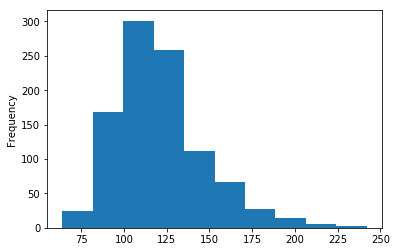

In [50]:
#value_counts- generally for categorical variables
%matplotlib inline
movies.duration.plot(kind='hist')


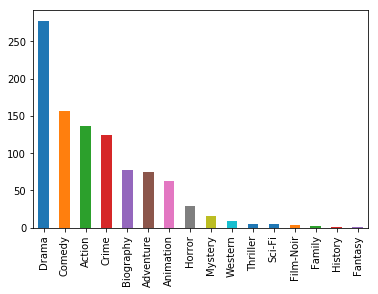

In [53]:
movies.genre.value_counts().plot(kind='bar')

In [55]:
#  How do I handle missing values in pandas
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail()
# What does "NaN" mean?

# "NaN" is not a string, rather it's a special value: numpy.nan.
# It stands for "Not a Number" and indicates a missing value.
# read_csv detects missing values (by default) when reading the file, and replaces them with this special value

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [59]:
#1st method:
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [61]:
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [62]:
# is.null.sum- COUNT MISSING VALUES

In [64]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [66]:
pd.Series([True, False, True]).sum() #true = 1, false= 0, axis=0 is default


2

In [69]:
ufo[ufo.City.isnull()] # cities whose value is mmissing

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [71]:

#what should you do about the missing values?
#drop  missing values
ufo.shape

(18241, 5)

In [74]:
ufo.dropna(how='any') # drop rows if any of rows is missing values

,City,Colors Reported,Shape Reported,State,Time
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
19,Bering Sea,RED,OTHER,AK,4/30/1943 23:00
36,Portsmouth,RED,FORMATION,VA,7/10/1945 1:30
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00
82,San Jose,BLUE,CHEVRON,CA,7/15/1947 21:00
84,Modesto,BLUE,DISK,CA,8/8/1947 22:00
91,Scipio,RED,SPHERE,IN,5/10/1948 19:00
111,Tarrant City,ORANGE,CIRCLE,AL,8/15/1949 22:00
129,Napa,GREEN,DISK,CA,6/10/1950 0:00
138,Coeur d'Alene,ORANGE,CIGAR,ID,7/2/1950 13:00


In [76]:
ufo.dropna(how='any').shape  #15755 rows dropped out of 18241

(2486, 5)

In [79]:
ufo.dropna(how='all').shape

(18241, 5)

In [82]:
#if you want to drop SOME of those variable which has NA values
ufo.dropna(subset=['City']).shape #25 city na rows dropped

(18216, 5)

In [88]:
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [92]:
ufo['Shape Reported'].value_counts() #by defaut missing values are excluded

LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
PYRAMID         1
DOME            1
FLARE           1
HEXAGON         1
Name: Shape Reported, dtype: int64

In [96]:
ufo['Shape Reported'].value_counts(dropna=False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
PYRAMID         1
DOME            1
FLARE           1
HEXAGON         1
Name: Shape Reported, dtype: int64

In [104]:

ufo['Shape Reported'].fillna(value="Various", inplace=True)

In [106]:
# What do I need to know about pandas index
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [108]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [109]:
#index aka rowlabels

In [111]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')